# Homework 2

1) The probability of rolling snake eyes (two ones) is the probability of each of those appearing multiplied

$$
\frac{1}{6}\times\frac{1}{6} = \frac{1}{36}
$$
   To rolls a seven, the dice can be in any one of 6 combinations. The probability of any single face appearing is $ \frac{1}{6} $ and the probability of any single sum is then $ \frac{1}{36} $. Using this knowledge the total probability of rolling a seven is 
   $$ 6 \times \frac{1}{36} = \frac{1}{6} $$

2) The probability of the sums of 2 six sided dice is given by the convolution of their respective probability density functions. The probability density function of a single die is has a value of 1/6 from 1 to 6 and is 0 otherwise. It is a discrete function since it can only take on values 1 through 6.

Skipping to the numerical calculation since that's all I really am concerned about.

Need to add analyitical solution here

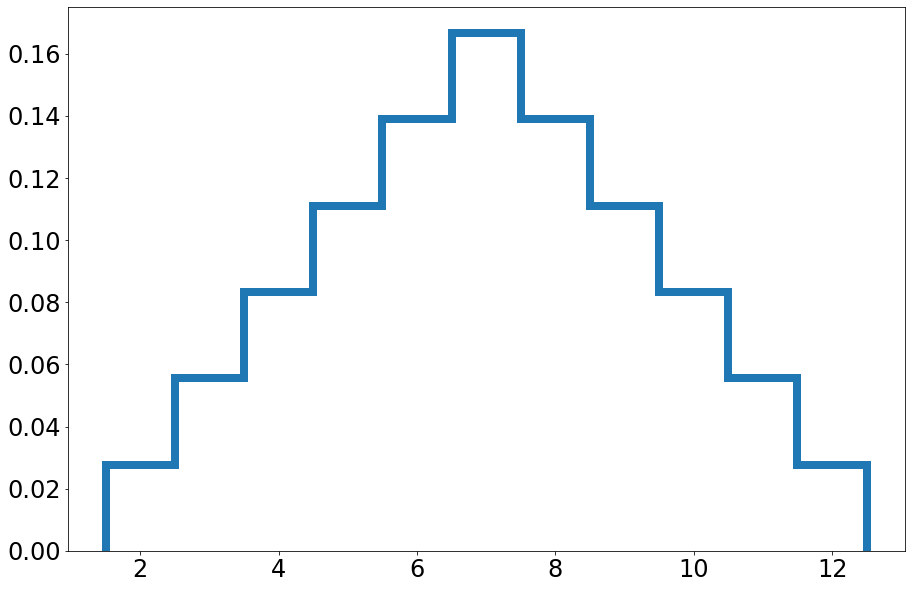

In [44]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# fig, ax = plt.subplots(1, 1)
plt.rcParams["figure.figsize"] = (15,10)
plt.tick_params(labelsize = 24)
x = np.arange(1, 12, 1)
edges = np.arange(1.5, 13.5, 1) 

pdf1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
pdf2 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

conv  = np.convolve(pdf1, pdf2)

plt.stairs(conv, edges, linewidth = 8)

The above plot is the probability of each sum

3) The mean and standard deviation can be computed by defining the convultution as an arbitrary distribution using the `stats.rv_discrete` object and calling the mean and var methods.

In [45]:
sums = np.arange(2,13,1)

pdfconv = stats.rv_discrete(values = (sums, conv))

print("The mean of the convovled distributions is ", pdfconv.mean(),
      "and the variance is", pdfconv.var())

The mean of the convovled distributions is  6.999999999999998 and the variance is 5.833333333333357


The given values of the mean and standard deviation can be loosely verified by comparing the above distribution to a gaussian with the same mean and standard deviation using the knowledge that the sum of many independent distributions approaches a gaussian distribution. 

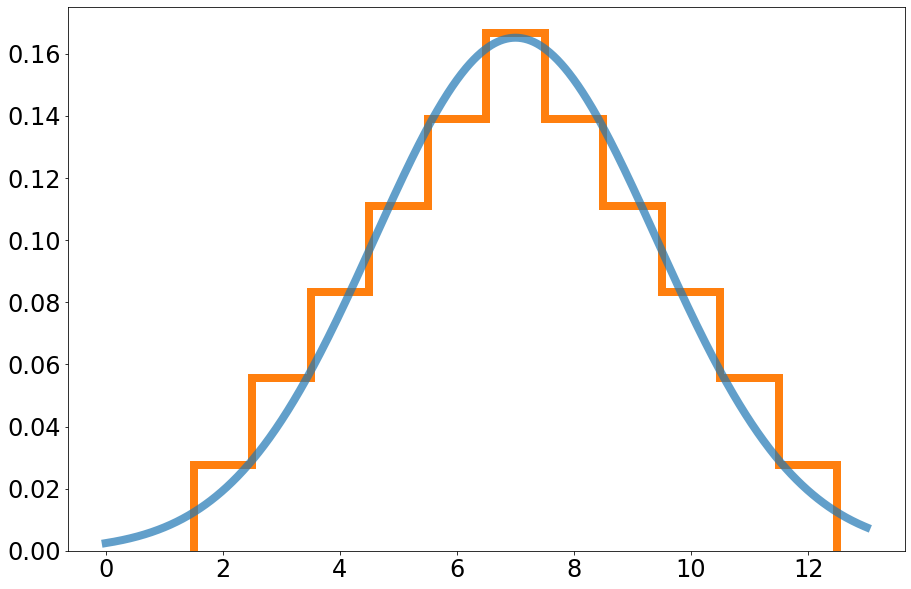

In [53]:

plt.tick_params(labelsize = 24)

x = np.linspace(0,13,1000)

plt.plot(x, stats.norm.pdf(x,loc = pdfconv.mean(), scale = pdfconv.std()),
                           linewidth = 8, alpha = 0.7)
plt.stairs(conv, edges, linewidth = 8)

4) Graph the **average** of 10 dice. Becase we want the average of 10 dice, the x axis must be rescaled from the sum by dividing by the number of dice. The possible values for the sum of the ten die are from 10 to 60. 

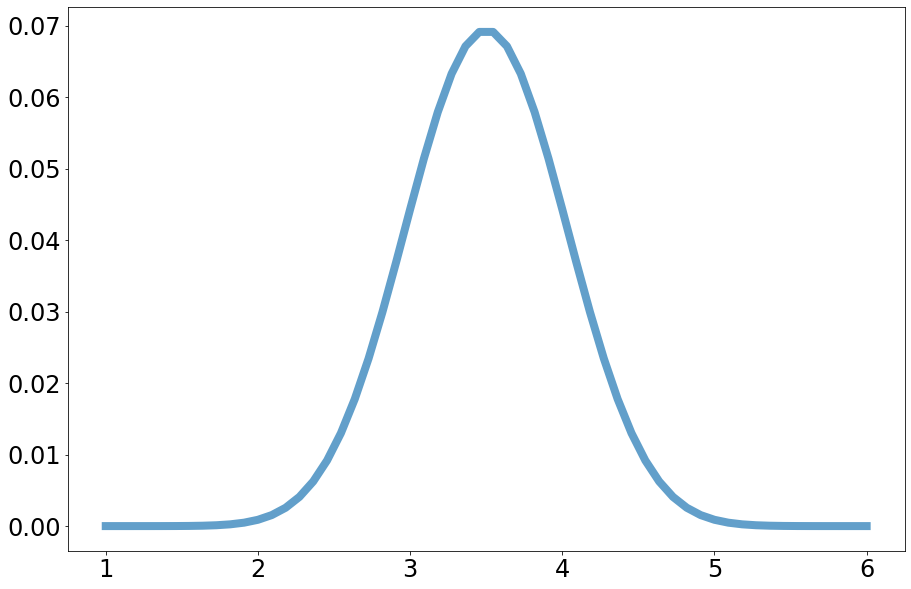

In [73]:



pdf1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
conv = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

for i in range(10):
    conv  = np.convolve(conv, pdf1)

x = np.linspace(1,6,len(conv))

plt.tick_params(labelsize = 24)
plt.plot(x, conv, linewidth = 8, alpha = 0.7)

The above distribution represents the probability of getting average of x for 10 die.
The central limit theorem says that the sum of n indpenedent distributions tends towards a gaussian as n increases. This means that the above distribution is not necessarily a gaussian distribution but that a gaussian distribution with the same mean and variance can be used to approximate the average distribution of n independent distributions. 

4) The below is the plot of two gaussian distributions that will be used to show that the sum and average of two gaussian distributions is also a gaussain. Further more, the mean of the summed gaussian distributions is the mean of the two gaussian distributions combined and the standard deviation of the sum of the two gaussians is the square root of the sum of the variances. 

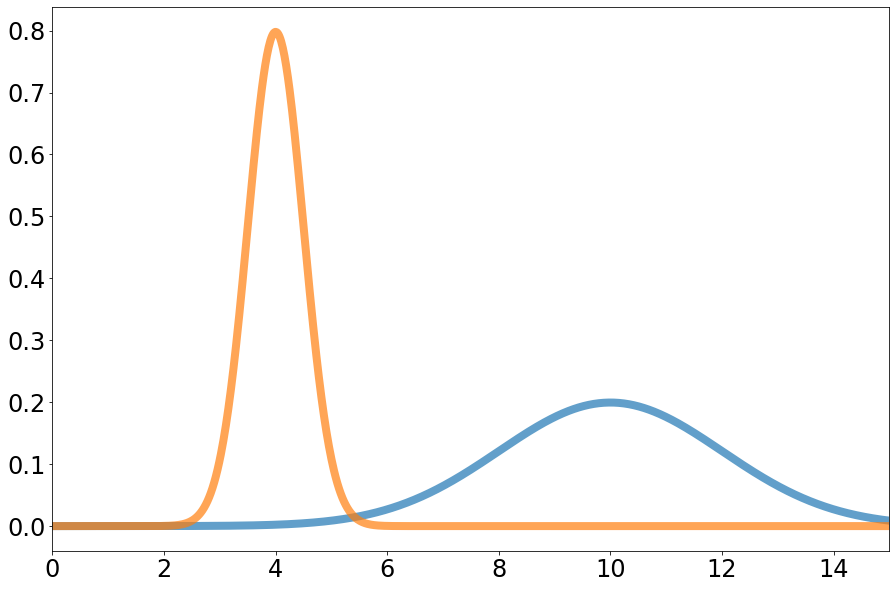

In [93]:
fig, ax = plt.subplots(1, 1)

plt.tick_params(labelsize = 24)
plt.xlim([0,15])
x = np.linspace(0,15,1000)
ax.plot(x,stats.norm.pdf(x,loc = 10, scale = 2),linewidth = 8,alpha = 0.7)
ax.plot(x,stats.norm.pdf(x,loc = 4, scale = 0.5),linewidth = 8,alpha = 0.7)
plt.show()

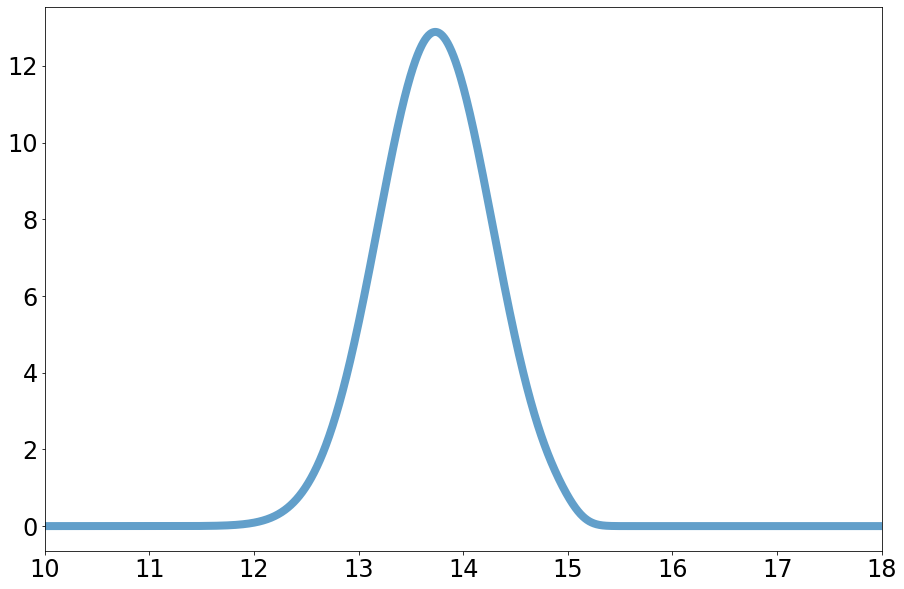

In [103]:
conv = np.convolve(stats.norm.pdf(x,loc = 10, scale = 2),
                   stats.norm.pdf(x,loc = 4, scale = 0.5))

xconv = np.linspace(10,18,len(conv))

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
plt.xlim([10,18])

ax.plot(xconv,conv,linewidth = 8,alpha = 0.7)